In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
car_prices = pd.read_csv("CarPrice_Assignment.csv")
car_prices

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [12]:
features = ['wheelbase','carlength','carwidth','curbweight','enginesize','horsepower','highwaympg','price']
data = car_prices[features].copy()
data

,wheelbase,carlength,carwidth,curbweight,enginesize,horsepower,highwaympg,price
0,88.6,168.8,64.1,2548,130,111,27,13495.0
1,88.6,168.8,64.1,2548,130,111,27,16500.0
2,94.5,171.2,65.5,2823,152,154,26,16500.0
3,99.8,176.6,66.2,2337,109,102,30,13950.0
4,99.4,176.6,66.4,2824,136,115,22,17450.0
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,114,28,16845.0
201,109.1,188.8,68.8,3049,141,160,25,19045.0
202,109.1,188.8,68.9,3012,173,134,23,21485.0
203,109.1,188.8,68.9,3217,145,106,27,22470.0


In [14]:
data.corr()['price']

wheelbase     0.577816
carlength     0.682920
carwidth      0.759325
curbweight    0.835305
enginesize    0.874145
horsepower    0.808139
highwaympg   -0.697599
price         1.000000
Name: price, dtype: float64

In [18]:
data = data.drop(['wheelbase'], axis = 1)

data.dropna(inplace=True)
data

,carlength,carwidth,curbweight,enginesize,horsepower,highwaympg,price
0,168.8,64.1,2548,130,111,27,13495.0
1,168.8,64.1,2548,130,111,27,16500.0
2,171.2,65.5,2823,152,154,26,16500.0
3,176.6,66.2,2337,109,102,30,13950.0
4,176.6,66.4,2824,136,115,22,17450.0
...,...,...,...,...,...,...,...
200,188.8,68.9,2952,141,114,28,16845.0
201,188.8,68.8,3049,141,160,25,19045.0
202,188.8,68.9,3012,173,134,23,21485.0
203,188.8,68.9,3217,145,106,27,22470.0


In [29]:
x = (data - data.mean())/(data.max()-data.min())
y = data['price']

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_val , y_train, y_val = train_test_split(x, y , test_size = 0.12 ,random_state = 5 )
x_train = x_train.T
y_train = np.array([y_train])
print(y_train.shape, x_train.shape)


(1, 180) (7, 180)


In [45]:
def initialize_parameters(lenw):
     w = np.random.randn( 1, lenw)
     b = 0
     return w , b

In [50]:
def forward_prop(x, w, b ):
    z = np.dot(w, x) + b
    return z

In [52]:
def cost_function(z, y):
    m = y.shape[1]
    J = ( 1/ (2 * m) )* np.sum(np.square(z - y))
    return J

In [55]:
def back_prop(x, y, z):
    m = y.shape[1]
    dz = (1/m) * (z - y)
    dw = np.dot(dz, x.T)
    db = np.sum(dz)
    return dw, db

In [47]:
def gradient_descent( w , b, dw , db , learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w , b


In [65]:
import matplotlib.pyplot as plt

def linear_regression(x_train, y_train, learning_rate, epochs):
    lenw = x_train.shape[0]
    w, b = initialize_parameters(lenw)
    cost_train = []  
    m_train = y_train.shape[1]

    for i in range(0, epochs):
        z_train = forward_prop(x_train, w, b)
        cost = cost_function(z_train, y_train)  
        cost_train.append(cost) 
        dw, db = back_prop(x_train, y_train, z_train)
        w, b = gradient_descent(w, b, dw, db, learning_rate)

       
    plt.plot(cost_train)
    plt.xlabel('Epoch')
    plt.ylabel('Cost')
    plt.title('Cost over Epochs')
    plt.show()




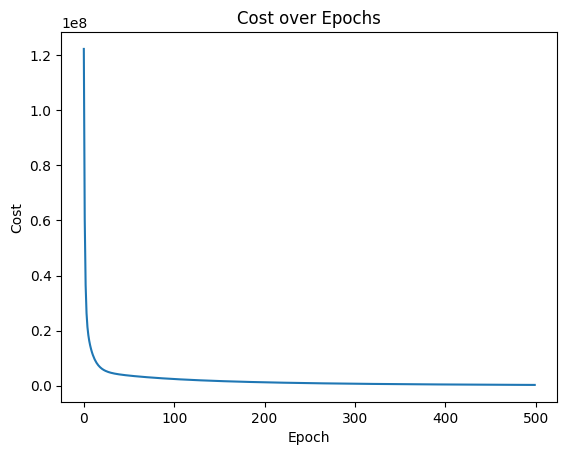

In [66]:
linear_regression(x_train, y_train, 0.4, 500)